In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

enc = preprocessing.OneHotEncoder(sparse=False)

dataFile = pd.read_csv('./Mixcancer.csv')
x = dataFile.values[:, 1:]
y = dataFile.values[:, 0]

y = y.reshape(len(y),1)
y = enc.fit_transform(y)
x = preprocessing.MinMaxScaler().fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0, shuffle=True)

In [2]:
def sigmoid(v):
    return 1/(1+np.exp(-v))

def sigmoid_der(v):
    return sigmoid(v)*(1-sigmoid(v))

def reLu(v):
    return np.maximum(v,0)

def reLu_der(v):
    v[v<=0] = 0
    v[v>0] = 1
    return v

def softmax(v):
    e = np.exp(v)
    return e / e.sum(axis=1, keepdims=True)

def softmax_der(v):
    return softmax(v) * (1-softmax(v))

In [3]:
def crossEntrop(o,y):
    return (-y*(np.log(o)) - (1-y)* np.log(1-o))

def crossEntrDeriv(o,y):
    return o-y

Final Accuracy: 0.94
Final Error: 0.14792423944275207


C:\Users\Scott\AppData\Local\Temp/ipykernel_33768/571178963.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f1.show()
C:\Users\Scott\AppData\Local\Temp/ipykernel_33768/571178963.py:81: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f2.show()


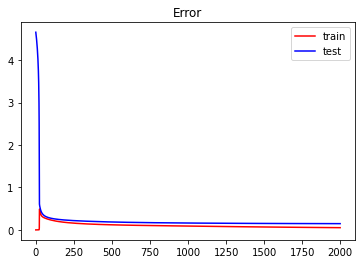

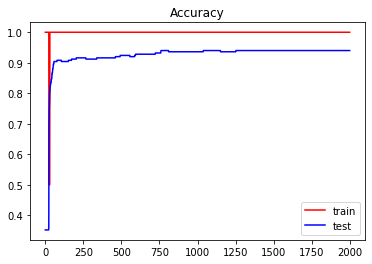

In [4]:
import matplotlib.pyplot as plt
from sklearn import metrics

np.random.seed(0)
w1 = np.random.uniform(-1,1,[len(x[0]),40]) #weights of the first layer
b1 = np.zeros([1,40]) #bias of the first layer
w2 = np.random.uniform(-1,1,[40,2]) #weights of the second layer
b2 = np.zeros([1, 2]) #bias of the second layer

l = 0.01
epochs = 2000
batch_size = 8

trainError = []
testError = []
trainAcc = []
testAcc = []

for epoch in range(epochs):
    for i in range(0, x_train.shape[0], batch_size):
        x_mini = x_train[i:i + batch_size-1, :]
        y_mini = y_train[i:i + batch_size-1, :]
        
        #feedforward
        in1 = x_mini@w1 + b1
        o1 = reLu(in1)
        in2 = o1@w2 + b2
        o2 = softmax(in2)
        
        #error calculation
        error = crossEntrop(o2 ,y_mini).mean()
        
        #backpropagation Layer 2
        dE_dO2 = crossEntrDeriv(o2, y_mini)
        dO2_dIn2 = softmax_der(in2)
        dIn2_dW2 = o1
        dIn2_B2 = 1
        dE_dW2 = (1/x_mini.shape[0])*dIn2_dW2.T@(dE_dO2*dO2_dIn2)
        dE_dB2 = (1/x_mini.shape[0])*np.ones([1,len(x_mini)])@(dE_dO2*dO2_dIn2)

        #backpropagation Layer 1
        dIn2_dO1 = w2
        dO1_dIn1 = reLu_der(in1)
        dIn1_dW1 = x_mini
        dE_dW1 = (1/x_mini.shape[0])*dIn1_dW1.T@((dE_dO2*dO2_dIn2@dIn2_dO1.T)*dO1_dIn1)
        dE_dB1 = (1/x_mini.shape[0])*np.ones([len(x_mini)])@((dE_dO2*dO2_dIn2@dIn2_dO1.T)*dO1_dIn1)

        #updating parameters
        b2-=l*dE_dB2
        w2-=l*dE_dW2
        b1-=l*dE_dB1
        w1-=l*dE_dW1
    
    #Error
    trainError.append(error)
    testError.append(crossEntrop(softmax(reLu(x_test@w1+b1)@w2+b2), y_test).mean())
    
    #Accuracy
    train_preds = np.where(o2 > 0.5, 1, 0)
    trainAcc.append(metrics.accuracy_score(y_mini, train_preds))
    test_preds = np.where(softmax(reLu(x_test@w1+b1)@w2+b2) > 0.5,1,0)
    testAcc.append(metrics.accuracy_score(y_test, test_preds))

    
print('Final Accuracy: ' + str(metrics.accuracy_score(y_test, test_preds)))
print('Final Error: ' + str(crossEntrop(softmax(reLu(x_test@w1+b1)@w2+b2), y_test).mean()))

z=np.arange(epochs)
f1= plt.figure(1)
plt.plot(z, trainError, label='train', color='red')
plt.plot(z, testError, label='test', color='blue')
plt.legend(loc='best')
plt.title('Error')
f1.show()

f2 = plt.figure(2)
plt.plot(z, trainAcc, label='train', color='red')
plt.plot(z, testAcc, label='test', color='blue')
plt.legend(loc='best')
plt.title('Accuracy')
f2.show()